In [ ]:
import matplotlib.pyplot as plt
import pickle

In [ ]:
def plot_residual_connectivity(connectivity, method: str = "wpli"):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

    axs[0].imshow(
        connectivity["pre_during"], vmin=-0.2, vmax=0.2, cmap="tab20c"
    )
    axs[0].set_title(f"pre_during {method}")
    axs[0].set_ylabel("EEG")
    axs[0].set_xlabel("EEG")

    im = axs[1].imshow(
        connectivity["pre_post"], vmin=-0.2, vmax=0.2, cmap="tab20c"
    )
    axs[1].set_title(f"pre_post {method}")
    axs[1].set_xlabel("EEG")

    im = axs[2].imshow(
        connectivity["during_post"], vmin=-0.2, vmax=0.2, cmap="tab20c"
    )
    axs[2].set_title(f"during_post {method}")
    axs[2].set_xlabel("EEG")

    fig.colorbar(im, ax=axs.ravel())
    plt.show()
    
def plot_connectivity(connectivity, method: str = "wpli"):
    fig, axs = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

    axs[0].imshow(
        connectivity["pre"].get_data("dense")[:, :, 0], vmin=0, vmax=1, cmap="tab20c"
    )
    axs[0].set_title(f"Pre {method}")
    axs[0].set_ylabel("EEG")
    axs[0].set_xlabel("EEG")

    im = axs[1].imshow(
        connectivity["during"].get_data("dense")[:, :, 0], vmin=0, vmax=1, cmap="tab20c"
    )
    axs[1].set_title(f"Pre {method}")
    axs[1].set_xlabel("EEG")

    im = axs[2].imshow(
        connectivity["post"].get_data("dense")[:, :, 0], vmin=0, vmax=1, cmap="tab20c"
    )
    axs[2].set_title(f"Pre {method}")
    axs[2].set_xlabel("EEG")

    fig.colorbar(im, ax=axs.ravel())
    plt.show()

In [ ]:
# read a pickle file
with open('/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/wpli_connectivity.pkl', 'rb') as f:
    connectivity = pickle.load(f)

In [ ]:
plot_connectivity(connectivity, method="wpli")

In [75]:
from itertools import combinations

residual_connectivity = {}
for stage1, stage2 in combinations(connectivity.keys(), 2):
    print(f"Comparing {stage1} and {stage2}")
    residual_connectivity[f"{stage1}_{stage2}"] = (connectivity[stage1].get_data("dense") - connectivity[stage2].get_data("dense")).squeeze()

Comparing pre and during
Comparing pre and post
Comparing pre and combine
Comparing during and post
Comparing during and combine
Comparing post and combine


In [ ]:
for key, value in residual_connectivity.items():
    print(key, value.shape)
    print(f"{value.min()} - {value.max()}")

In [ ]:
plot_residual_connectivity(residual_connectivity, method="wpli")

In [ ]:
import os.path as op

import matplotlib.pyplot as plt
import mne
import numpy as np
from mne import make_forward_solution, setup_source_space, setup_volume_source_space
from mne.datasets import sample
from mne.io import read_raw_fif
from mne.minimum_norm import apply_inverse_epochs, make_inverse_operator
from mne.viz import circular_layout

from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_connectivity_circle

import random
import pandas as pd

In [ ]:
def generate_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        r = round(random.random(), 3)
        g = round(random.random(), 3)
        b = round(random.random(), 3)
        a = 1.0  # Keeping alpha at 1.0 for full opacity
        colors.append((r, g, b, a))
    return colors

In [ ]:
# read_metadata
metadata = pd.read_csv('/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/new_metadata.csv')
metadata.head()

label_names = eval(metadata.loc[0, "channels"])
node_order = label_names

# Second we need to define Node Angle
node_angles = circular_layout(
    label_names, node_order, start_pos=90, group_boundaries=[0, len(label_names) // 2]
)
node_colors = generate_colors(len(label_names))

In [ ]:
def plot_circular_connectivity(connectivity, stage, label_names, node_angles, node_colors, method: str = "wpli", is_save: bool = False):
    fig, ax = plt.subplots(figsize=(8, 8), facecolor="black", subplot_kw=dict(polar=True))

    plot_connectivity_circle(
    connectivity.get_data("dense")[:, :, 0],
    label_names,
    n_lines=20,
    node_angles=node_angles,
    node_colors=node_colors,
    title=f"All-to-All Connectivity {stage} stimuli" f"Condition ({method})",
    ax=ax,
    )
    fig.tight_layout()
    
    if is_save:
        fig.savefig(f"{method}_{stage}.png", dpi=300)  

In [65]:
# front to prietal

red = (0.458, 0.0, 0.0, 1.0)
blue = (0.0, 0.0, 0.999, 1.0)
yellow = (0.999, 0.999, 0.308, 1.0)
green = (0.0,1.0,0.0, 1.0)

channel_color = {
    "Fp1": red,
    "Fp2": red,
    "Fpz": red,
    "AF3": red,
    "AF4": red,
    "F1": red,
    "F2": red,
    "F3": red,
    "F4": red,
    "F5": red,
    "F6": red,
    "F8": red,
    "FC1": yellow,
    "FC3": yellow,
    "FC2": yellow,
    "FC4": yellow,
    "FC6": yellow,
    "FCz": yellow,
    "C3": yellow,
    "C4": yellow,
    "C6": yellow,
    "C1": yellow,
    "C2": yellow,
    "T8": yellow,
    "TP7": yellow,
    "TP8": yellow,
    "CP5": yellow,
    "CP3": yellow,
    "CP1": yellow,
    "CP2": yellow,
    "CP4": yellow,
    "CP6": yellow,
    "P7": blue,
    "P5": blue,
    "P3": blue,
    "P1": blue,
    "Pz": blue,
    "P2": blue,
    "P4": blue,
    "P6": blue,
    "P8": blue,
    "PO7": blue,
    "PO3": blue,
    "POz": blue,
    "PO4": blue,
    "PO8": blue,
    "O1": blue,
    "O2": blue,
    "Oz": blue,
}

label_names = list(channel_color.keys())
node_order = label_names

# Second we need to define Node Angle
node_angles = circular_layout(
    label_names, node_order, start_pos=90, group_boundaries=[0, len(label_names) // 2]
)
node_colors = list(channel_color.values())

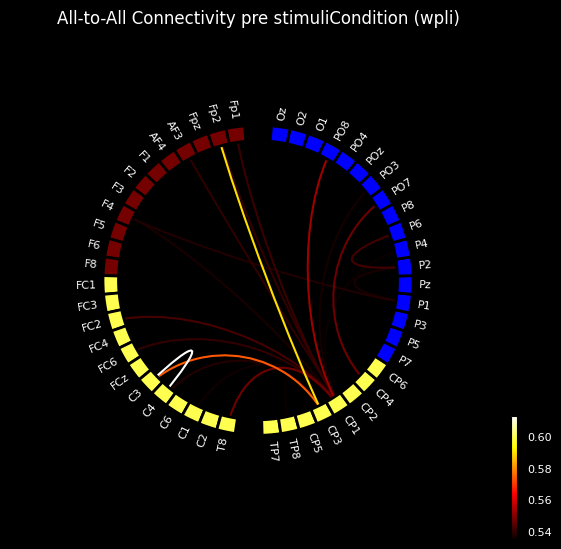

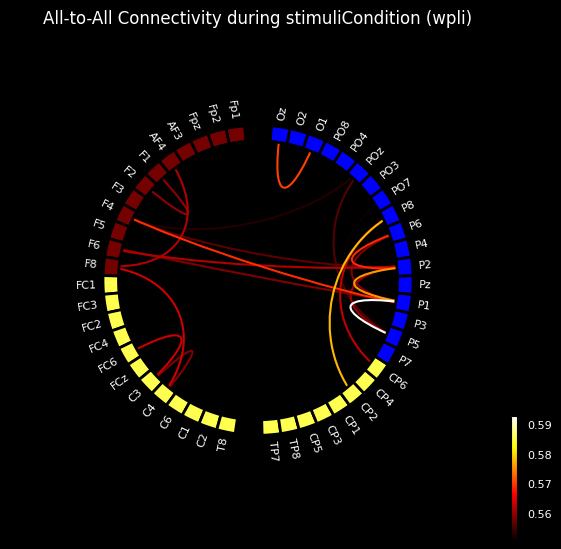

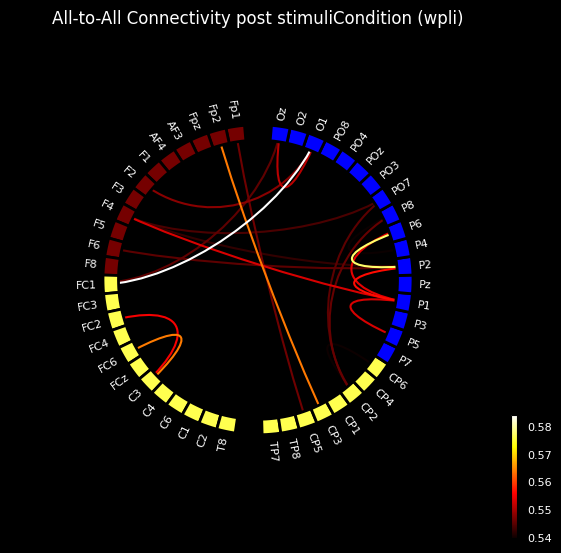

In [66]:
stage = "pre"
plot_circular_connectivity(connectivity[stage], stage, label_names, node_angles, node_colors, method="wpli", is_save=True)

stage = "during"
plot_circular_connectivity(connectivity[stage], stage, label_names, node_angles, node_colors, method="wpli", is_save=True)

stage = "post"
plot_circular_connectivity(connectivity[stage], stage, label_names ,node_angles, node_colors, method="wpli", is_save=True)

In [73]:
# left to right
def detect_channel(channels):
    detected_channels = []

    for channel in channels:
        # Extract the numeric part from the channel name
        numeric_part = ''.join(filter(str.isdigit, channel))
        
        # Determine if the channel is left or right based on the numeric part
        if numeric_part:
            number = int(numeric_part)
            if number % 2 == 0:
                side = "Right"
            else:
                side = "Left"
        else:
            side = "Left"  # For channels without numeric parts center channel is considered left

        detected_channels.append((channel, side))

    return detected_channels

channels_side = detect_channel(label_names)
left_channels = [channel for channel, side in channels_side if side == "Left"]
right_channels = [channel for channel, side in channels_side if side == "Right"]

left_color = (0.0, 0.0, 0.999, 1.0)
right_color = (0.458, 0.0, 0.0, 1.0)

channel_color = {
    **{channel: left_color for channel in left_channels},
    **{channel: right_color for channel in right_channels},
}

label_names = list(channel_color.keys())
node_order = label_names

# Second we need to define Node Angle
node_angles = circular_layout(
    label_names, node_order, start_pos=90, group_boundaries=[0, len(label_names) // 2]
)
node_colors = list(channel_color.values())



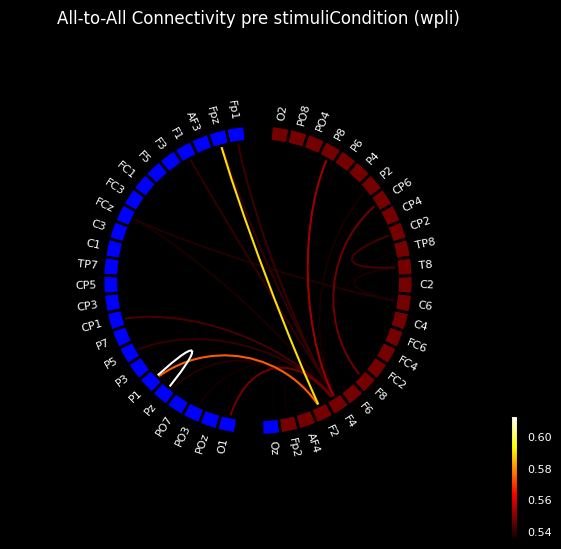

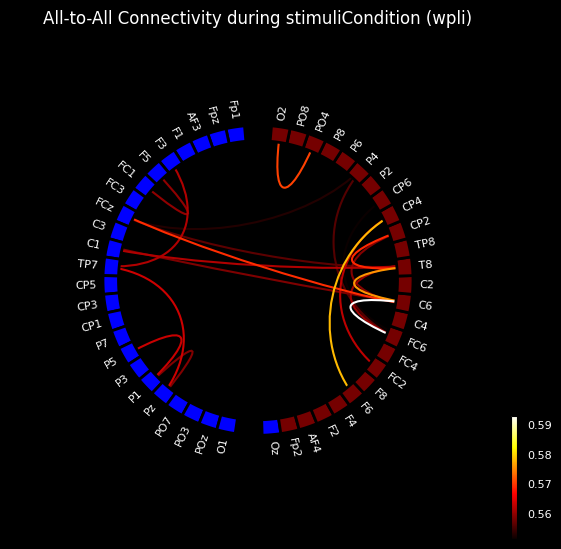

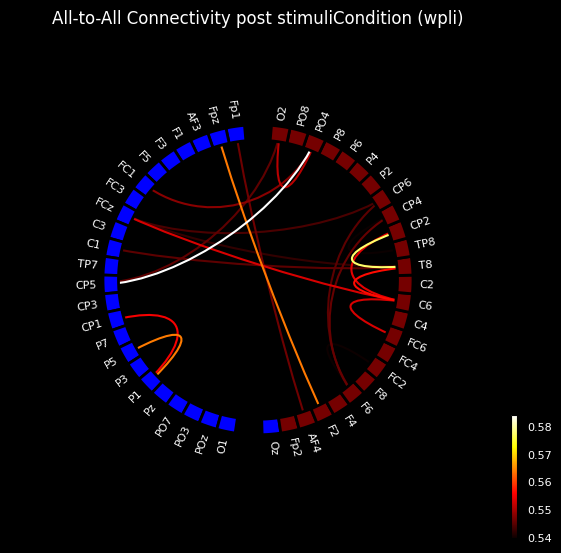

In [74]:
stage = "pre"
plot_circular_connectivity(connectivity[stage], stage, label_names, node_angles, node_colors, method="wpli", is_save=True)

stage = "during"
plot_circular_connectivity(connectivity[stage], stage, label_names, node_angles, node_colors, method="wpli", is_save=True)

stage = "post"
plot_circular_connectivity(connectivity[stage], stage, label_names, node_angles, node_colors, method="wpli", is_save=True)